In [1]:
import sys
sys.path.append('../lung_GAN')
from importlib import reload

import torch
import lung_BoW_data
import BigBiGAN
reload(BigBiGAN)

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
ls ../lung_GAN/

In [6]:
batch_size = 10
dataset = lung_BoW_data.Dataset(size = (256, 256))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
iter_data = iter(dataloader)
X = next(iter_data).cuda()


In [ ]:
M = BigBiGAN.G_D(resolution = 256).cuda()
M.load_state_dict(torch.load("../lung_GAN/reat_lung_256_lr_2e-05_5e-05/model/model7800"))

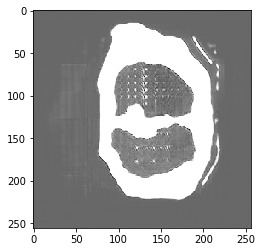

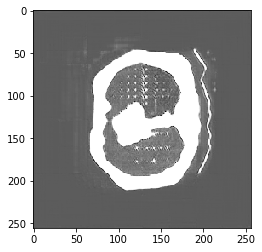

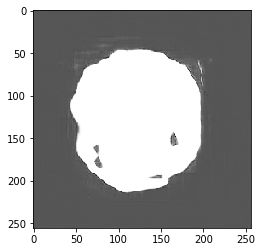

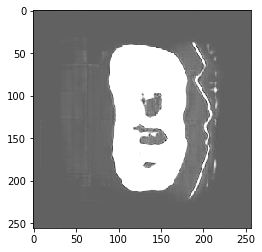

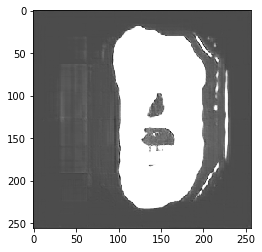

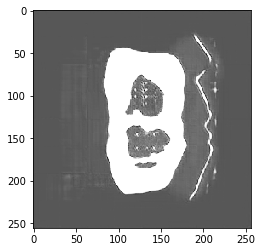

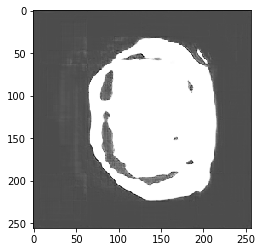

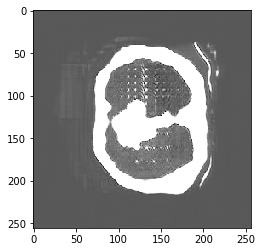

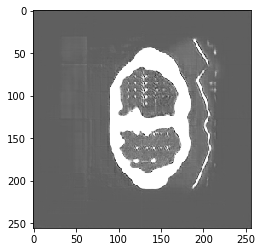

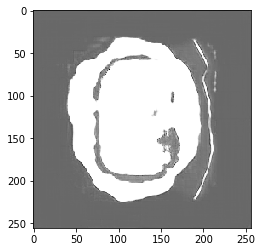

In [10]:
Z = torch.randn([10, 128]).cuda()
M.eval()
for iii in range(10):
    X = M.G(Z[[iii], :]).cpu().data.numpy()
    plt.figure()
    plt.imshow(X[0, 0 ], cmap = "gray")


In [11]:
X = next(iter_data).cuda()
X_recon, Z, loss = M.encode(X, n_iter = 10000)

0 101681.03125
10 99940.140625
20 97898.40625
30 96029.4921875
40 94036.53125
50 92321.03125
60 90678.53125
70 88690.15625
80 86862.7109375
90 85129.3125
100 83554.8359375
110 82236.734375
120 81101.53125
130 80076.453125
140 79068.53125
150 78052.765625
160 76997.390625
170 75996.015625
180 75062.828125
190 74152.578125
200 73206.59375
210 72243.9453125
220 71173.2109375
230 70138.34375
240 68262.140625
250 67038.2578125
260 65902.2578125
270 64936.0546875
280 63883.30859375
290 63016.06640625
300 62383.47265625
310 61772.328125
320 61143.71875
330 60500.30859375
340 59921.0078125
350 59344.37109375
360 58817.2734375
370 58377.5546875
380 57945.1171875
390 57497.15234375
400 57071.2421875
410 56686.71484375
420 56312.984375
430 55969.72265625
440 55638.83203125
450 55324.734375
460 55023.953125
470 54737.8984375
480 54443.89453125
490 54152.5546875
500 53860.9765625
510 53566.578125
520 53287.921875
530 53014.84765625
540 52745.8671875
550 52472.12890625
560 52195.296875
570 51923.734

4350 28672.92578125
4360 28653.77734375
4370 28633.439453125
4380 28612.673828125
4390 28592.1640625
4400 28572.5234375
4410 28553.8203125
4420 28535.103515625
4430 28515.56640625
4440 28496.54296875
4450 28476.365234375
4460 28453.751953125
4470 28428.77734375
4480 28404.111328125
4490 28382.3125
4500 28361.5703125
4510 28341.884765625
4520 28320.14453125
4530 28297.552734375
4540 28277.0546875
4550 28257.28515625
4560 28238.75390625
4570 28221.021484375
4580 28203.345703125
4590 28186.04296875
4600 28168.81640625
4610 28150.751953125
4620 28130.9453125
4630 28112.4609375
4640 28092.92578125
4650 28072.314453125
4660 28053.337890625
4670 28033.80859375
4680 28015.1015625
4690 27997.828125
4700 27981.02734375
4710 27965.11328125
4720 27949.59375
4730 27934.705078125
4740 27920.27734375
4750 27905.625
4760 27890.13671875
4770 27875.365234375
4780 27860.625
4790 27846.0234375
4800 27831.78125
4810 27817.87890625
4820 27804.265625
4830 27790.962890625
4840 27773.998046875
4850 27761.45898

8500 24100.400390625
8510 24093.5078125
8520 24086.60546875
8530 24079.765625
8540 24073.1015625
8550 24066.51953125
8560 24059.9609375
8570 24053.546875
8580 24047.14453125
8590 24040.515625
8600 24034.0625
8610 24027.58203125
8620 24020.9140625
8630 24013.8046875
8640 24006.6640625
8650 23999.08984375
8660 23991.55078125
8670 23984.15234375
8680 23976.7734375
8690 23969.6796875
8700 23962.7421875
8710 23955.859375
8720 23949.125
8730 23942.33203125
8740 23935.4296875
8750 23928.5625
8760 23921.78125
8770 23914.81640625
8780 23907.7109375
8790 23900.556640625
8800 23893.2578125
8810 23885.822265625
8820 23878.7734375
8830 23871.798828125
8840 23864.849609375
8850 23857.80078125
8860 23850.57421875
8870 23843.4375
8880 23836.482421875
8890 23829.568359375
8900 23822.734375
8910 23815.927734375
8920 23809.08984375
8930 23802.287109375
8940 23795.45703125
8950 23788.6875
8960 23781.9375
8970 23775.15234375
8980 23768.171875
8990 23761.306640625
9000 23754.40625
9010 23747.48828125
9020 2

In [55]:
loss_fun = torch.nn.MSELoss(reduction = "mean")

tensor(0., device='cuda:0')

In [12]:




Z = torch.autograd.Variable( torch.randn([ batch_size, 128] ), requires_grad = True  )
M.eval()


optim = torch.optim.Adam([Z], lr = 1e-3)

for iii in range(2000):
    X_generate = M.G(Z)
    loss = ( (X_generate - X) ** 2 ).sum()
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if iii % 10 == 0:
        print ( iii, loss.item() ) 
    


0 107055.3125
10 103942.9609375
20 101041.578125
30 98449.4140625
40 95664.7734375
50 92242.7578125
60 88998.34375
70 86310.0390625
80 84369.390625
90 82795.5625
100 81282.09375
110 79868.0
120 78648.03125
130 77305.25
140 76030.9375
150 74709.4921875
160 73187.78125
170 71897.140625
180 70634.8671875
190 69552.40625
200 68454.4375
210 66779.953125
220 65049.45703125
230 63352.13671875
240 62247.7265625
250 61289.671875
260 60545.09375
270 59899.2421875
280 59195.640625
290 58657.6875
300 58096.67578125
310 57486.5859375
320 56966.1796875
330 56534.06640625
340 56108.53125
350 55679.08984375
360 55202.671875
370 54731.15625
380 54258.8046875
390 53673.1015625
400 52663.3203125
410 51987.421875
420 51453.2265625
430 50933.45703125
440 50450.24609375
450 50092.6484375
460 49842.203125
470 49623.60546875
480 49488.25
490 49346.83984375
500 49227.1796875
510 49142.37890625
520 49055.625
530 48950.546875
540 48843.453125
550 48764.5390625
560 48672.83984375
570 48578.70703125
580 48498.5390

In [13]:
XXX = X_recon.cpu().data.numpy()

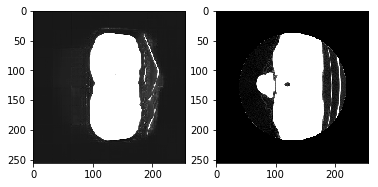

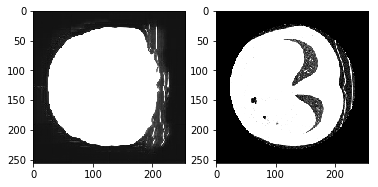

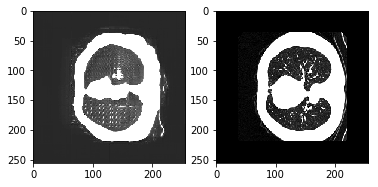

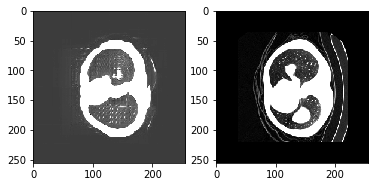

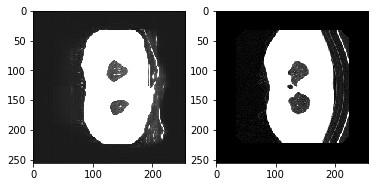

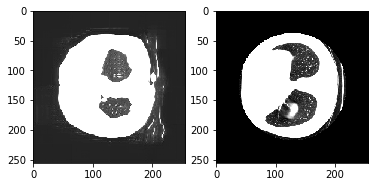

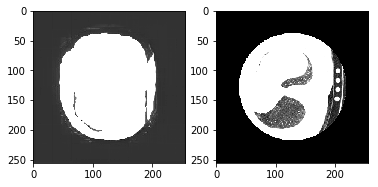

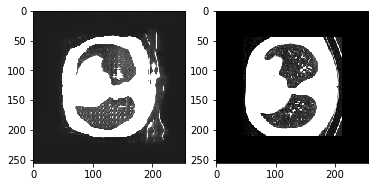

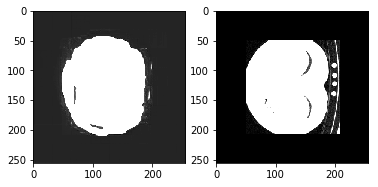

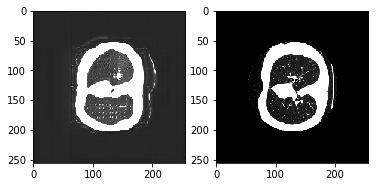

In [7]:
for iii in range(batch_size):
    plt.figure()
    plt.subplot(121)
    plt.imshow(XXX[iii, 0, :, :], cmap = 'gray')
    plt.subplot(122)
    plt.imshow(X[iii, 0, :, :].cpu().data.numpy(), cmap = "gray")

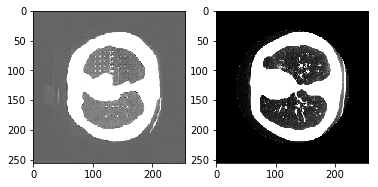

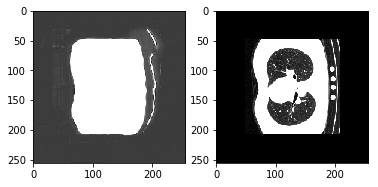

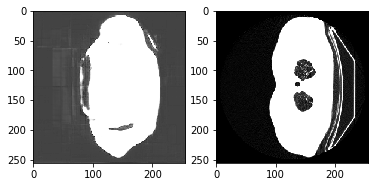

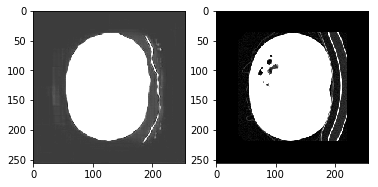

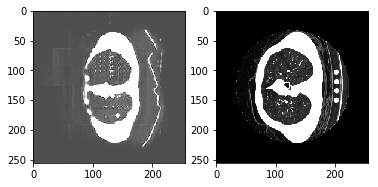

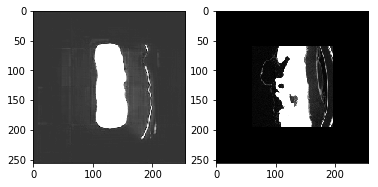

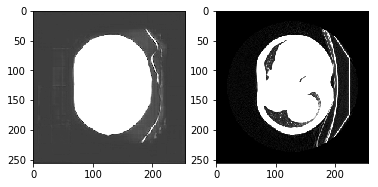

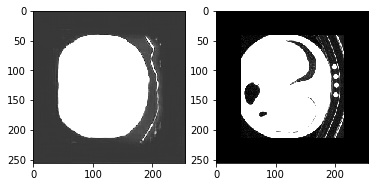

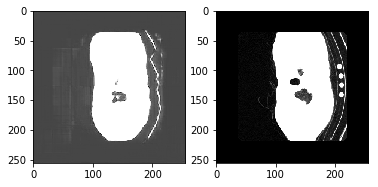

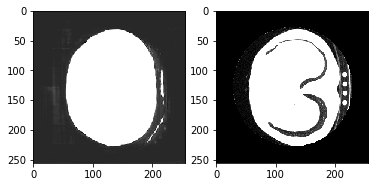

In [14]:
for iii in range(batch_size):
    plt.figure()
    plt.subplot(121)
    plt.imshow(XXX[iii, 0, :, :], cmap = 'gray')
    plt.subplot(122)
    plt.imshow(X[iii, 0, :, :].cpu().data.numpy(), cmap = "gray")

In [17]:
iter_data = iter(dataloader)
X = next(iter_data).cuda()



In [19]:
M.e

SyntaxError: invalid syntax (<ipython-input-19-6afd9326dd46>, line 1)

In [40]:
loss_function = torch.nn.CrossEntropyLoss(reduction = "sum")

In [29]:
X_generate.type()

'torch.cuda.FloatTensor'

In [19]:
M = BigBiGAN.VAE_adv(resolution = 256).cuda()
# M.load_state_dict(torch.load("../lung_GAN/VAE_lung_256_lr_0.0001_0.0001_0.0002_alpha_500.0/model/model7200"))
# M.load_state_dict(torch.load("../lung_GAN/VAE_lung_256_lr_0.0001_0.0001_0.0002_alpha_1000.0/model/model5100"))
M.load_state_dict(torch.load("../lung_GAN/VAE_lung_256_lr_0.0001_0.0001_0.0002_alpha_3000.0/model/model8700"))

Adding attention layer in G at resolution 64
Param count for Gs initialized parameters: 3236065
Adding attention layer in E at resolution 64
Param count for Es initialized parameters: 2398656
Adding attention layer in D at resolution 64
Param count for Ds initialized parameters: 2481601


<All keys matched successfully>

In [20]:
iter_data = iter(dataloader)
X = next(iter_data).cuda()

mu, log_var = M.E(X)
Z = M.reparameterize(mu, log_var)
X_recon = M.G(Z)
XXX = X_recon.cpu().data.numpy()

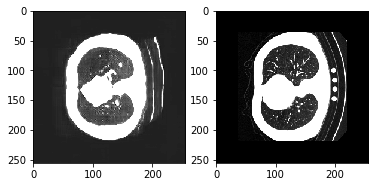

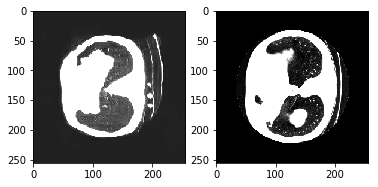

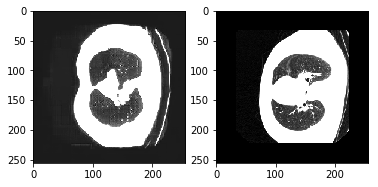

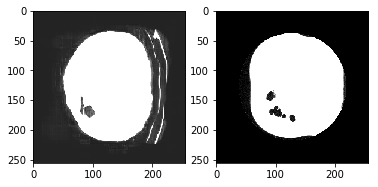

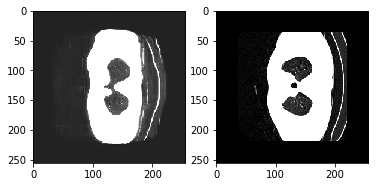

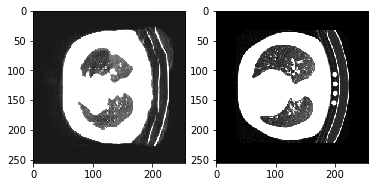

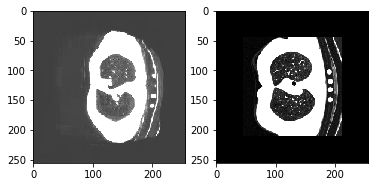

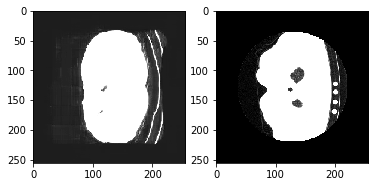

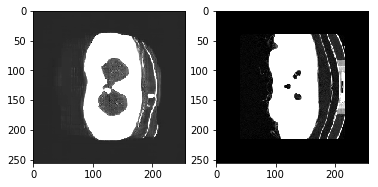

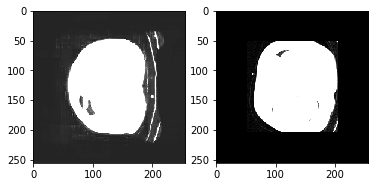

In [12]:
for iii in range(batch_size):
    plt.figure()
    plt.subplot(121)
    plt.imshow(XXX[iii, 0, :, :], cmap = 'gray')
    plt.subplot(122)
    plt.imshow(X[iii, 0, :, :].cpu().data.numpy(), cmap = "gray")

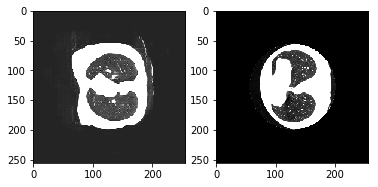

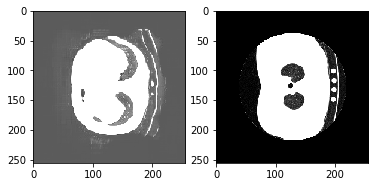

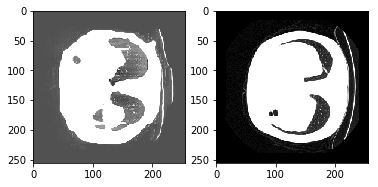

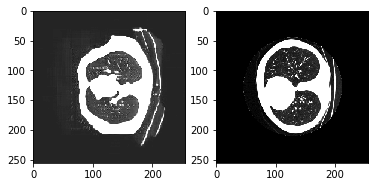

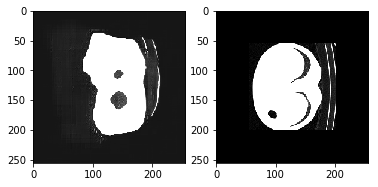

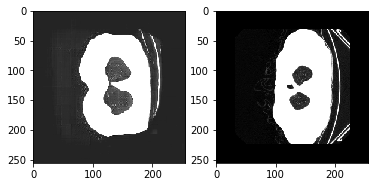

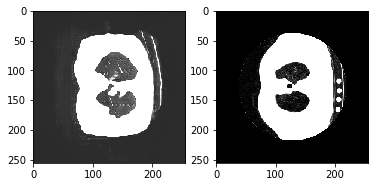

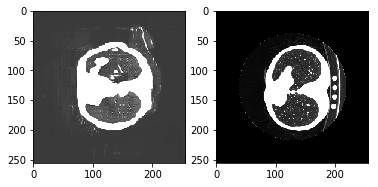

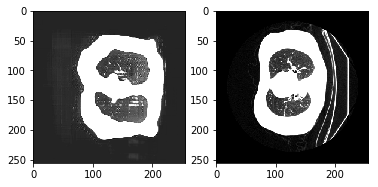

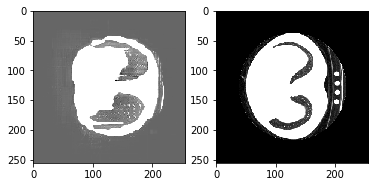

In [21]:
for iii in range(batch_size):
    plt.figure()
    plt.subplot(121)
    plt.imshow(XXX[iii, 0, :, :], cmap = 'gray')
    plt.subplot(122)
    plt.imshow(X[iii, 0, :, :].cpu().data.numpy(), cmap = "gray")